In [1]:
import tensorflow as tf

2023-06-28 11:13:19.347805: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-28 11:13:19.688463: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-28 11:13:20.449012: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from tensorflow import keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv('balenced_torch_data.csv')

In [6]:
data.head()

,API Name,Parameters,Test case,Label
0,torch.randint,arg_0 = 3\narg_1_0 = 4\narg_1_1 = 3\narg_1_2 =...,v1.8.0/cuda-oracle/potential-bug/torch.randint...,bug
1,torch.unique,"arg_0_tensor = torch.rand([4], dtype=torch.flo...",v1.8.0/cuda-oracle/potential-bug/torch.unique/...,bug
2,torch.rand,arg_0 = 20\narg_1 = 16\narg_2 = 4\narg_3 = 32\...,v1.8.0/cuda-oracle/potential-bug/torch.rand/2.py,bug
3,torch.diag_embed,"arg_0_tensor = torch.randint(0,2,[0], dtype=to...",v1.8.0/cuda-oracle/success/torch.diag_embed/22.py,success
4,torch.randperm,arg_0 = 2901\ngenerator = None\n,v1.8.0/cuda-oracle/potential-bug/torch.randper...,bug


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   API Name    2954 non-null   object
 1   Parameters  2722 non-null   object
 2   Test case   2954 non-null   object
 3   Label       2954 non-null   object
dtypes: object(4)
memory usage: 92.4+ KB


In [8]:
data.iloc[:,-1].value_counts()

bug        1477
success    1477
Name: Label, dtype: int64

In [9]:
data.iloc[:, -2].head()

0    v1.8.0/cuda-oracle/potential-bug/torch.randint...
1    v1.8.0/cuda-oracle/potential-bug/torch.unique/...
2     v1.8.0/cuda-oracle/potential-bug/torch.rand/2.py
3    v1.8.0/cuda-oracle/success/torch.diag_embed/22.py
4    v1.8.0/cuda-oracle/potential-bug/torch.randper...
Name: Test case, dtype: object

In [10]:
data.iloc[:, -1].replace("success",1).replace("bug",0).head()

0    0
1    0
2    0
3    1
4    0
Name: Label, dtype: int64

In [11]:
data['combintedString']=data[['API Name','Parameters']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1)

In [12]:
data.head()

,API Name,Parameters,Test case,Label,combintedString
0,torch.randint,arg_0 = 3\narg_1_0 = 4\narg_1_1 = 3\narg_1_2 =...,v1.8.0/cuda-oracle/potential-bug/torch.randint...,bug,torch.randintarg_0 = 3\narg_1_0 = 4\narg_1_1 =...
1,torch.unique,"arg_0_tensor = torch.rand([4], dtype=torch.flo...",v1.8.0/cuda-oracle/potential-bug/torch.unique/...,bug,"torch.uniquearg_0_tensor = torch.rand([4], dty..."
2,torch.rand,arg_0 = 20\narg_1 = 16\narg_2 = 4\narg_3 = 32\...,v1.8.0/cuda-oracle/potential-bug/torch.rand/2.py,bug,torch.randarg_0 = 20\narg_1 = 16\narg_2 = 4\na...
3,torch.diag_embed,"arg_0_tensor = torch.randint(0,2,[0], dtype=to...",v1.8.0/cuda-oracle/success/torch.diag_embed/22.py,success,torch.diag_embedarg_0_tensor = torch.randint(0...
4,torch.randperm,arg_0 = 2901\ngenerator = None\n,v1.8.0/cuda-oracle/potential-bug/torch.randper...,bug,torch.randpermarg_0 = 2901\ngenerator = None\n


In [13]:
x=data.iloc[:, -1]
y=data.iloc[:, -2].replace("success",1).replace("bug",0)

In [14]:
x.shape

(2954,)

In [15]:
import re

In [16]:
token = re.compile('[A-Za-z]+|[!?,.()]')

In [17]:
def reg_text(text):
    new_text = token.findall(text)
    new_text = [word.lower() for word in new_text]
    return new_text

In [18]:
data['text'] = data.combintedString.apply(reg_text)

In [19]:
word_set = set()
for text in data.text:
    for word in text:
        word_set.add(word) 

In [20]:
max_word = len(word_set) + 1
max_word

485

In [21]:
word_list = list(word_set)

In [22]:
word_list.index('arg')

111

In [23]:
word_index =  dict((word, word_list.index(word) + 1) for word in word_list)

In [24]:
word_index

{'min': 1,
 'distarg': 2,
 'atleast': 3,
 'thresholdarg': 4,
 'histcarg': 5,
 'reflect': 6,
 'geluarg': 7,
 'tril': 8,
 'poissonnlllossnan': 9,
 'pinversearg': 10,
 'softshrinkarg': 11,
 'momentum': 12,
 'exparg': 13,
 'randint': 14,
 'hstackarg': 15,
 'xlogyarg': 16,
 'dstackarg': 17,
 'fracarg': 18,
 ',': 19,
 'bilinear': 20,
 'sinarg': 21,
 'multiheadattentionarg': 22,
 'slogdetarg': 23,
 'conv': 24,
 'set': 25,
 'type': 26,
 'pairwise': 27,
 'rand': 28,
 'flattenarg': 29,
 'eps': 30,
 'absarg': 31,
 'logitarg': 32,
 'tensorsarg': 33,
 'catarg': 34,
 'fliparg': 35,
 'hardshrinknan': 36,
 'flattennan': 37,
 'baddbmmarg': 38,
 'soft': 39,
 'bool': 40,
 'identitynan': 41,
 'training': 42,
 'selunan': 43,
 'dtype': 44,
 'bm': 45,
 'view': 46,
 'promote': 47,
 'tanharg': 48,
 'int': 49,
 'triangular': 50,
 'logaddexparg': 51,
 'clone': 52,
 'addcdivarg': 53,
 'hypotarg': 54,
 'nansumarg': 55,
 'p': 56,
 'meanarg': 57,
 'generator': 58,
 'with': 59,
 'reciprocalarg': 60,
 'avg': 61,
 'num

In [25]:
data_ok = data.text.apply(lambda x: [word_index.get(word, 0) for word in x])

In [26]:
len(data_ok.iloc[2])

11

In [27]:
maxlen = max(len(x) for x in data_ok)

In [28]:
maxlen

14262

In [29]:
data_ok = keras.preprocessing.sequence.pad_sequences(data_ok.values, maxlen=maxlen)

In [30]:
data_ok.shape

(2954, 14262)

In [31]:
model = tf.keras.Sequential()

2023-06-28 11:14:51.517204: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-28 11:14:51.917677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-28 11:14:51.917777: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [56]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_word, 50, input_length=maxlen))
model.add(tf.keras.layers.Conv1D(32, 7, activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling1D(3))
model.add(tf.keras.layers.Conv1D(32, 7, activation='relu', padding='same'))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [57]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 14262, 50)         24250     
                                                                 
 conv1d_35 (Conv1D)          (None, 14262, 32)         11232     
                                                                 
 max_pooling1d_13 (MaxPoolin  (None, 4754, 32)         0         
 g1D)                                                            
                                                                 
 conv1d_36 (Conv1D)          (None, 4754, 32)          7200      
                                                                 
 global_average_pooling1d_4   (None, 32)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 1)                

In [58]:
model.compile(optimizer=keras.optimizers.RMSprop(),loss='binary_crossentropy',metrics=['acc'])#accuricy

In [60]:
history=model.fit(data_ok,y,epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
19/19 [==============================] - 1s 49ms/step - loss: 0.6933 - acc: 0.4930 - val_loss: 0.6932 - val_acc: 0.4958
Epoch 2/10
19/19 [==============================] - 1s 47ms/step - loss: 0.6934 - acc: 0.5011 - val_loss: 0.6930 - val_acc: 0.4958
Epoch 3/10
19/19 [==============================] - 1s 44ms/step - loss: 0.6933 - acc: 0.5011 - val_loss: 0.6930 - val_acc: 0.4958
Epoch 4/10
19/19 [==============================] - 1s 48ms/step - loss: 0.6932 - acc: 0.5011 - val_loss: 0.6929 - val_acc: 0.4958
Epoch 5/10
19/19 [==============================] - 1s 45ms/step - loss: 0.6932 - acc: 0.4917 - val_loss: 0.6929 - val_acc: 0.4958
Epoch 6/10
19/19 [==============================] - 1s 48ms/step - loss: 0.6932 - acc: 0.4909 - val_loss: 0.6929 - val_acc: 0.4958
Epoch 7/10
19/19 [==============================] - 1s 45ms/step - loss: 0.6931 - acc: 0.5011 - val_loss: 0.6929 - val_acc: 0.4958
Epoch 8/10
19/19 [==============================] - 1s 45ms/step - loss: 0.6932 - a

In [36]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

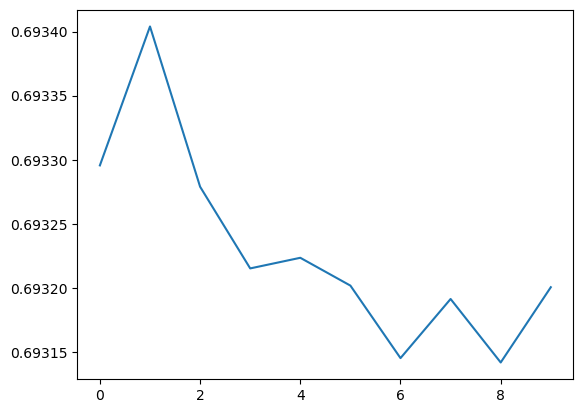

In [61]:
plt.plot(history.epoch,history.history.get('loss'))

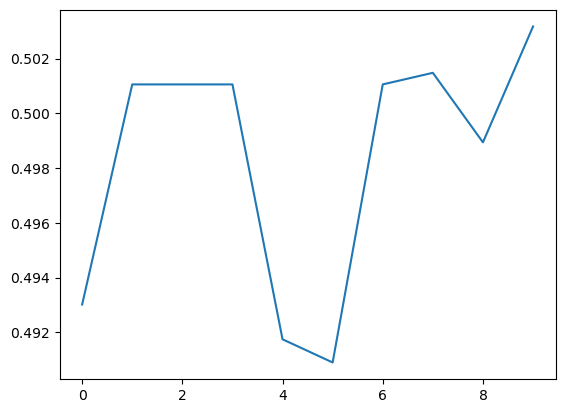

In [62]:
plt.plot(history.epoch,history.history.get('acc'))

In [ ]:
#for test data

In [63]:
test_data=pd.read_csv('./torch-testdata.csv')

In [64]:
test_data['combintedString']=test_data[['API Name','Parameters']].apply(lambda x : '{}{}'.format(x[0],x[1]), axis=1)

In [65]:
test_data['text'] = test_data.combintedString.apply(reg_text)

In [66]:
data_test_ok = test_data.text.apply(lambda x: [word_index.get(word, 0) for word in x])

In [67]:
data_test_ok = keras.preprocessing.sequence.pad_sequences(data_test_ok.values, maxlen=maxlen)

In [68]:
predict=model.predict(data_test_ok)

3/3 [==============================] - 0s 45ms/step


In [69]:
predict

array([[0.5021259 ],
       [0.50212985],
       [0.50211746],
       [0.5023535 ],
       [0.502262  ],
       [0.5021802 ],
       [0.50212306],
       [0.50220716],
       [0.50240177],
       [0.50229096],
       [0.5021802 ],
       [0.5021802 ],
       [0.5021194 ],
       [0.5021345 ],
       [0.5021845 ],
       [0.50221294],
       [0.50212395],
       [0.50219214],
       [0.50217336],
       [0.50217795],
       [0.5021923 ],
       [0.5022154 ],
       [0.5021251 ],
       [0.5021833 ],
       [0.50226045],
       [0.50220853],
       [0.5023948 ],
       [0.50212336],
       [0.50227493],
       [0.50219077],
       [0.50242853],
       [0.502262  ],
       [0.5022262 ],
       [0.50218576],
       [0.5021194 ],
       [0.5021954 ],
       [0.50217223],
       [0.5022283 ],
       [0.50242645],
       [0.50225675],
       [0.50225675],
       [0.50221735],
       [0.50222766],
       [0.5021899 ],
       [0.5022613 ],
       [0.5022761 ],
       [0.5021245 ],
       [0.502

In [70]:
bug_count=0
nonbug_count=0
for numbers in predict:
    if numbers[0]>0.5:
        nonbug_count+=1
    else:
        bug_count+=1
print(bug_count)

0


In [71]:
labels = []

for prob in predict:
    if prob >= 0.5:
        labels.append("success")
    else:
        labels.append("fail")
test_data["Label"]=labels
test_data.to_csv('./outputdata_5050_balence_data.csv')